Soil A: D60 = 1.3000 mm, D10 = 0.0087 mm, Cu = 150.00
Soil B: D60 = 0.1385 mm, D10 = 0.0233 mm, Cu = 5.93


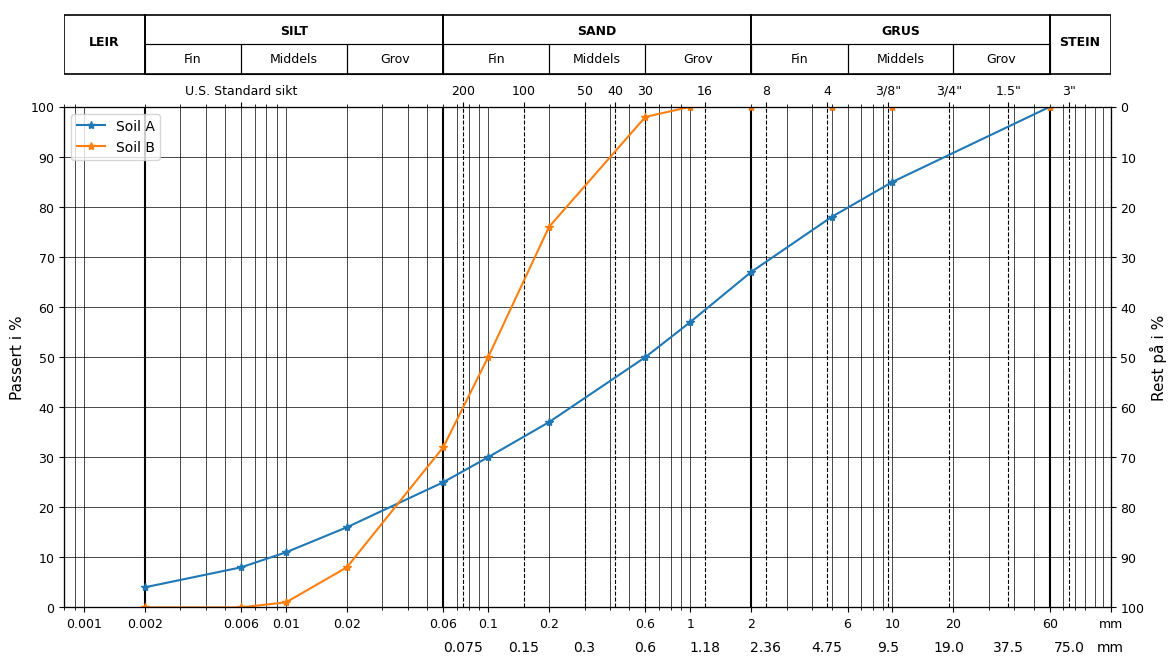

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grain_size_chart import grain_size_chart

# Exercise 1.1 of Aarhaug (1991): Geoteknikk og fundamenteringslære 1

# grain size in mm
gz = [60, 10, 5, 2, 1, 0.6, 0.2, 0.1, 0.06, 0.02, 0.01, 0.006, 0.002]

# soil mass in sieve in grams
# soil A
ja = np.array([0, 75, 35, 55, 50, 35, 65, 35, 25, 45, 25, 15, 20])
total_a = np.sum(ja) + 20  # add 20 g in pan
# compute percent passing
pa = 100 * (1 - np.cumsum(ja) / total_a)

# soil B
jb = np.array([0, 0, 0, 0, 0, 10, 110, 130, 90, 120, 35, 5, 0])
total_b = np.sum(jb) + 0  # add 0 g in pan
# compute percent passing
pb = 100 * (1 - np.cumsum(jb) / total_b)

# compute coefficient of uniformity (Cu) of soils A and B
# D60 is the grain size at 60% passing
D60_a = np.interp(60, pa[::-1], gz[::-1])
D60_b = np.interp(60, pb[::-1], gz[::-1])
# D10 is the grain size at 10% passing
D10_a = np.interp(10, pa[::-1], gz[::-1])
D10_b = np.interp(10, pb[::-1], gz[::-1])
# compute coefficient of uniformity
Cu_a = D60_a / D10_a
Cu_b = D60_b / D10_b
print(f"Soil A: D60 = {D60_a:.4f} mm, D10 = {D10_a:.4f} mm, Cu = {Cu_a:.2f}")
print(f"Soil B: D60 = {D60_b:.4f} mm, D10 = {D10_b:.4f} mm, Cu = {Cu_b:.2f}")

# Create a figure and axis 
fig, ax = plt.subplots(figsize=(13.5, 6.5))

# plot the grain size chart in Norwegian
grain_size_chart(fig, ax, English=False)

# plot soil A
ax.plot(gz, pa, '*-', label='Soil A')

# plot soil B
ax.plot(gz, pb, '*-', label='Soil B')

ax.legend()

plt.show()